In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [4]:
#Training the model
train_file= r"train.csv"
train_data=pd.read_csv(train_file)
train_data

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000
...,...,...,...,...,...,...,...,...,...,...,...
1163,6,1400,2,440,672,672,1,6,1978,1978,149500
1164,7,1472,2,402,384,802,2,7,1991,1992,160000
1165,5,789,1,250,789,789,1,5,1948,1950,115000
1166,6,1661,1,377,992,1661,1,8,1955,1996,165500


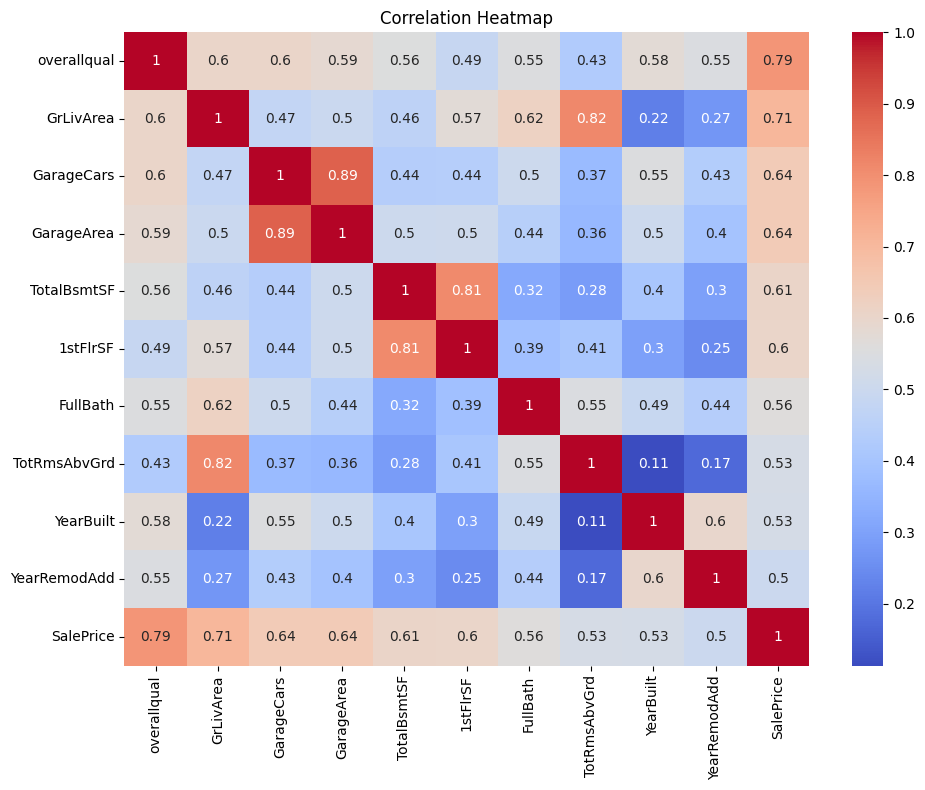

In [5]:
feature_names = ['overallqual', 'GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF',
                 'FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','SalePrice']  
# Calculate correlation matrix
corr_matrix = np.corrcoef(train_data, rowvar=False)

# Create heatmap with feature names as labels
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True,
            xticklabels=feature_names,
            yticklabels=feature_names)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [6]:
X_train=train_data.iloc[0:,0:-1].values
Y_train=train_data.iloc[0:,-1:].values
print(X_train)
#Z-score Normalization
mean = np.mean(X_train, axis=0)
std_dev = np.std(X_train, axis=0)
std_dev[std_dev == 0] = 1
X_train = (X_train - mean) / std_dev
X_train = np.hstack((np.ones((X_train.shape[0],1)), X_train))

[[   7 1820    1 ...    8 1925 1950]
 [   7 1646    1 ...    7 1941 1950]
 [   5 1316    2 ...    6 1929 2001]
 ...
 [   5  789    1 ...    5 1948 1950]
 [   6 1661    1 ...    8 1955 1996]
 [   7 1442    2 ...    5 1990 1990]]


In [15]:
def model(X_train,Y_train,iterations,alpha):
    m=Y_train.size
    cost_list=[]
    theta=np.ones((X_train.shape[1],1))    
    for i in range(iterations):
        y_pred=np.dot(X_train,theta)
        cost=(1/(2*m))*np.sum((y_pred-Y_train)**2)        
        dtheta=(1/m)*np.dot(X_train.T,(y_pred-Y_train))   
        theta=theta-(alpha*dtheta)
        cost_list.append(cost)
        if(i%(iterations/5)==0):
            print("cost is: ",cost)            
    return y_pred,theta,cost_list

iterations=1000
alpha=0.3781259
y_pred,theta,cost_list=model(X_train,Y_train,iterations,alpha) 

cost is:  19608272979.800224
cost is:  768925904.8042693
cost is:  759102442.4860663
cost is:  759060252.9330289
cost is:  759060071.7384142


Root mean square error:  38963.061249350445
Training accuracy:  0.7618968883565816


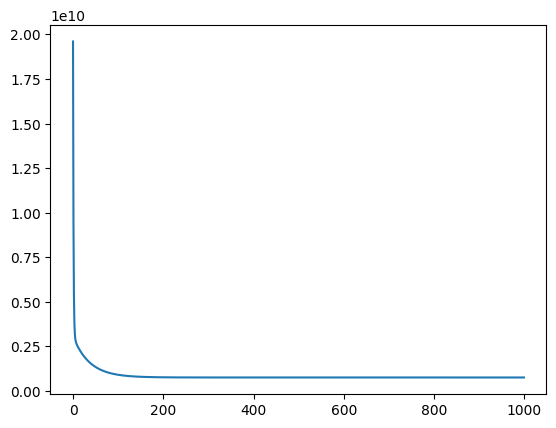

In [8]:
def rmse(y_actual, y_estimate):
    squared_diff = (y_actual - y_estimate) ** 2
    mean_squared_diff = np.mean(squared_diff)
    rmse_value = np.sqrt(mean_squared_diff)
    return(rmse_value)
print("Root mean square error: ",rmse(Y_train,y_pred))
def r_squared(y_actual, y_estimate):
    y_mean = np.mean(y_actual)
    ss_total = np.sum((y_actual - y_mean) ** 2)
    ss_residual = np.sum((y_actual - y_estimate) ** 2)
    return 1 - (ss_residual / ss_total)
print("Training accuracy: ", r_squared(Y_train,y_pred))
rng = np.arange(0,iterations)
plt.plot(rng,cost_list)
plt.show()

In [23]:
#Testing the model
test_file = r"test.csv"
data_test = pd.read_csv(test_file)
data_test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,8,1970,3,753,1085,1120,2,8,2006,2006,281000
1,6,1632,1,338,1240,1632,2,6,1958,1988,139000
2,7,1223,2,480,600,520,2,4,2005,2005,147400
3,5,1559,2,812,1559,1559,1,5,1948,1973,153500
4,4,630,1,286,630,630,1,3,1970,2002,86000
...,...,...,...,...,...,...,...,...,...,...,...
287,6,1158,2,576,1158,1158,1,5,2004,2004,158000
288,6,987,1,264,483,483,1,5,1972,2007,118000
289,6,848,2,420,848,848,1,4,2003,2003,140000
290,7,1266,2,388,1266,1266,2,6,2007,2007,159895


In [60]:
X_test = data_test.iloc[:, :-1].values  
y_test = data_test.iloc[0:,-1:].values 
#Normalization 
mean = np.mean(X_test, axis=0)
std_dev = np.std(X_test, axis=0)
std_dev[std_dev == 0] = 1
X_test = (X_test - mean) / std_dev
X_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))

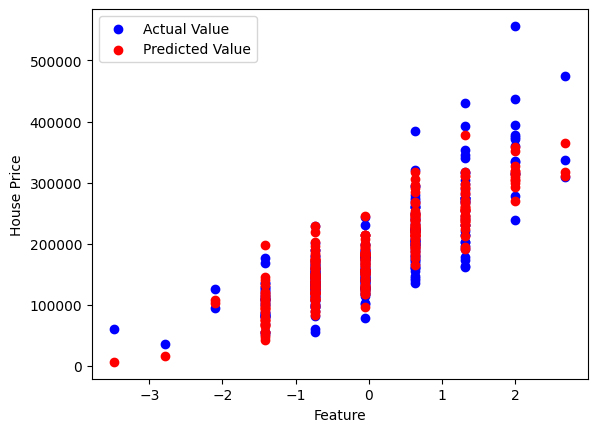

Testing accuracy:  82.1562395897647 %
Root mean square error:  32798.14118338621


In [59]:
y_test_pred=np.dot(X_test,theta)

plt.scatter(X_test[:,1], y_test, label = 'Actual Value', color = 'blue')
plt.scatter(X_test[:,1], y_test_pred, label = 'Predicted Value', color = 'red')
plt.xlabel('Feature')
plt.ylabel('House Price')
plt.legend()
plt.show()

print("Testing accuracy: ", (r_squared(y_test,y_test_pred))*100,"%")
print("Root mean square error: ",rmse(y_test,y_test_pred))